In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = 'download.jpeg'
image

'download.jpeg'

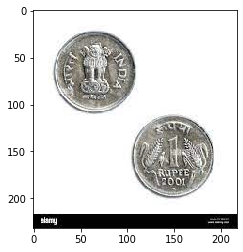

In [3]:
img = cv2.imread(image, 1)
plt.imshow(img)

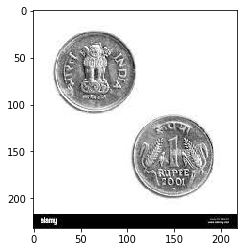

In [4]:
img_orig = img.copy()

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

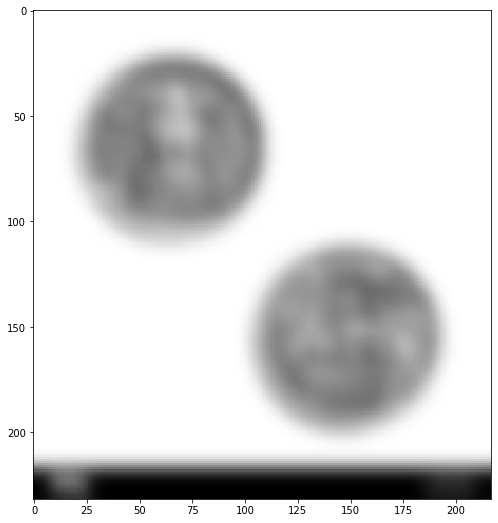

In [5]:
img = cv2.GaussianBlur(img,(21,21),cv2.BORDER_DEFAULT)
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img, cmap = 'gray')

In [6]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,0.9,100,param1 = 9,param2 = 47,minRadius=30)
circles

array([[[147.5, 155.5,  44.4],
        [ 66.5,  63.5,  41.9]]], dtype=float32)

In [7]:
def circle(circles):
    if circles is not None:
        
        circles_rounded = np.uint16(np.around(circles))
        print(str(circles_rounded.shape[1])+' Circle Found')
        return circles_rounded
    else:
        print('No Circle Found')

In [8]:
circles_rounded = circle(circles)
circles_rounded

2 Circle Found


array([[[148, 156,  44],
        [ 66,  64,  42]]], dtype=uint16)

In [9]:
count = 1
for i in circles_rounded[0, :]:
    cv2.circle(img_orig,(i[0],i[1]),i[2],(50,200,200),5)
    cv2.circle(img_orig,(i[0],i[1]),2,(255,0,0),3)
    cv2.putText(img_orig,str(count),(i[0]-70,i[1]+30),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)
    count+=1
    
    

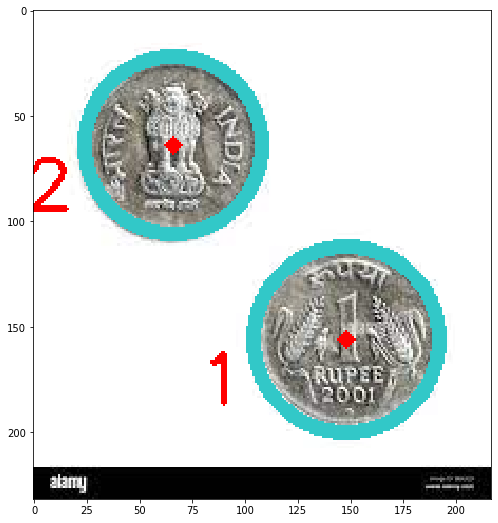

In [10]:
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_orig)

In [21]:
circles_rounded

array([[[148, 156,  44],
        [ 66,  64,  42]]], dtype=uint16)

In [24]:
def isInside(x_cord, y_cord, rad, x, y):
     
    # Compare radius of circle
    # with distance of its center
    # from given point
    if ((x - x_cord) * (x - x_cord) +
        (y - y_cord) * (y - y_cord) <= rad * rad):
        return True;
    else:
        return False;
    


In [47]:
x= int(input("Enter the x value:"))
y= int(input("Enter the y value:"))

Enter the x value:50
Enter the y value:50


In [51]:
count =1
for i in circles_rounded[0,:]:
    
    x_cord=i[0]
    
    y_cord=i[1]
    
    rad=i[2]
    
    if(isInside(x_cord, y_cord, rad, x, y)):
        print("Given pixel is Inside the circle {}".format(count))
    else:
        print("Given pixel is Outside the circle {}".format(count))
        
    count=count+1
    

Given pixel is Outside the circle 1
Given pixel is Inside the circle 2
